In [12]:
%run config.ipynb

import json
import ipynb
import config 

import pprint as pp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
client_credentials_manager = SpotifyClientCredentials(client_id="ee32f16e4aa74e26ae8d3cc472597762", client_secret="0101edeef8044ff1893971a79050512b")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Exception: File `'config.ipynb'` not found.

In [8]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    playlist_songs = sp.user_playlist_tracks(username, playlist_id, limit=50, fields=None, offset=offset, market=None)['items']
    return playlist_songs


def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()

    playlist_df['artist'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    playlist_df['track_name'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['username'] = np.array([song['added_by']['id'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['duration'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])

    return playlist_df

In [25]:
pochan = 'pochan'   # 31emr3wnzqcufqgxgdpwvyqqxh4u

m_playlist = get_user_playlist(pochan, 'spotify:playlist:27PEGgCeCoEkVxRQUoOkIM',sp)  # 36
m_df = create_dataframe(m_playlist)

m_playlist2 = get_user_playlist(pochan, 'spotify:playlist:59jhcgqhVYrza6HePLyqLv',sp)  # 12
m_df2 = create_dataframe(m_playlist2)

m_playlist3 = get_user_playlist(pochan, 'spotify:playlist:6hhYMdgC1sizdcy9PRLREN',sp)  # 35
m_df3 = create_dataframe(m_playlist3)

e_playlist = get_user_playlist('eric','spotify:playlist:27oidImF8m5FmYdFpW0oty', sp) # 50
e_df = create_dataframe(e_playlist)

e_playlist2 = get_user_playlist('eric','spotify:playlist:2Dk2iqFB6uGFrondfJCw0p', sp) # 26
e_df2 = create_dataframe(e_playlist2)

e_playlist3 = get_user_playlist('eric','spotify:playlist:5OmrPKYLi2lSAsbpTpealZ', sp) # 32
e_df3 = create_dataframe(e_playlist3)

# display(e_df) 

df_songs = pd.concat([e_df, m_df], ignore_index=True)
df_songs = pd.concat([df_songs, m_df2], ignore_index=True)
df_songs = pd.concat([df_songs, m_df3], ignore_index=True)
df_songs = pd.concat([df_songs, e_df2 ], ignore_index=True)
df_songs = pd.concat([df_songs, e_df3 ], ignore_index=True)

df_songs['username'].value_counts()

username
31mbenls3anq3dtoj7bxh24akknu    108
31emr3wnzqcufqgxgdpwvyqqxh4u     83
Name: count, dtype: int64

In [26]:
display(df_songs)

,artist,track_name,id,username,explicit,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,Drake,Spin Bout U,2ZL7WZcjuYKi1KUDtp4kCC,31mbenls3anq3dtoj7bxh24akknu,True,214588,0.763,-6.383,129.971,0.00961,0.720,0.229,0.1650,0.0447
1,Ktlyn,Boppin,3forEFl6LyfRggxX3sOln7,31mbenls3anq3dtoj7bxh24akknu,True,116166,0.889,-6.675,90.061,0.11500,0.633,0.673,0.1790,0.2090
2,Halsey,Die 4 Me,6VYAzAQGFsfEAwdorQaZuU,31mbenls3anq3dtoj7bxh24akknu,True,215021,0.688,-4.251,145.086,0.33800,0.742,0.564,0.3450,0.0733
3,Destiny's Child,Survivor,7qtAgn9mwxygsPOsUDVRRt,31mbenls3anq3dtoj7bxh24akknu,False,254040,0.524,-2.071,161.188,0.05330,0.904,0.655,0.7760,0.3980
4,ROSALÍA,LLYLM,2SiAcexM2p1yX6joESbehd,31mbenls3anq3dtoj7bxh24akknu,False,174044,0.555,-5.522,170.228,0.12900,0.634,0.555,0.1880,0.2730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Nicki Minaj,Super Freaky Girl - Roman Remix,29NV5l8hdRLDcpUbj5Tzs7,31mbenls3anq3dtoj7bxh24akknu,True,235939,0.946,-2.567,133.002,0.06160,0.885,0.907,0.3360,0.2260
187,YG,"Run (feat. Tyga, 21 Savage & BIA)",0yJCj7knf2cOXP1zzZnzkw,31mbenls3anq3dtoj7bxh24akknu,False,237623,0.873,-6.239,101.019,0.02210,0.607,0.391,0.1750,0.1650
188,Dr. Dre,Gospel (with Eminem),3a2jFwnts4Cf0OwJbK61SL,31mbenls3anq3dtoj7bxh24akknu,True,210027,0.919,-4.441,117.030,0.10300,0.869,0.655,0.1660,0.2320
189,Doja Cat,Get Into It (Yuh),0W6I02J9xcqK8MtSeosEXb,31mbenls3anq3dtoj7bxh24akknu,True,138293,0.912,-6.029,91.942,0.31500,0.655,0.793,0.0894,0.1620


In [22]:
import seaborn as sns

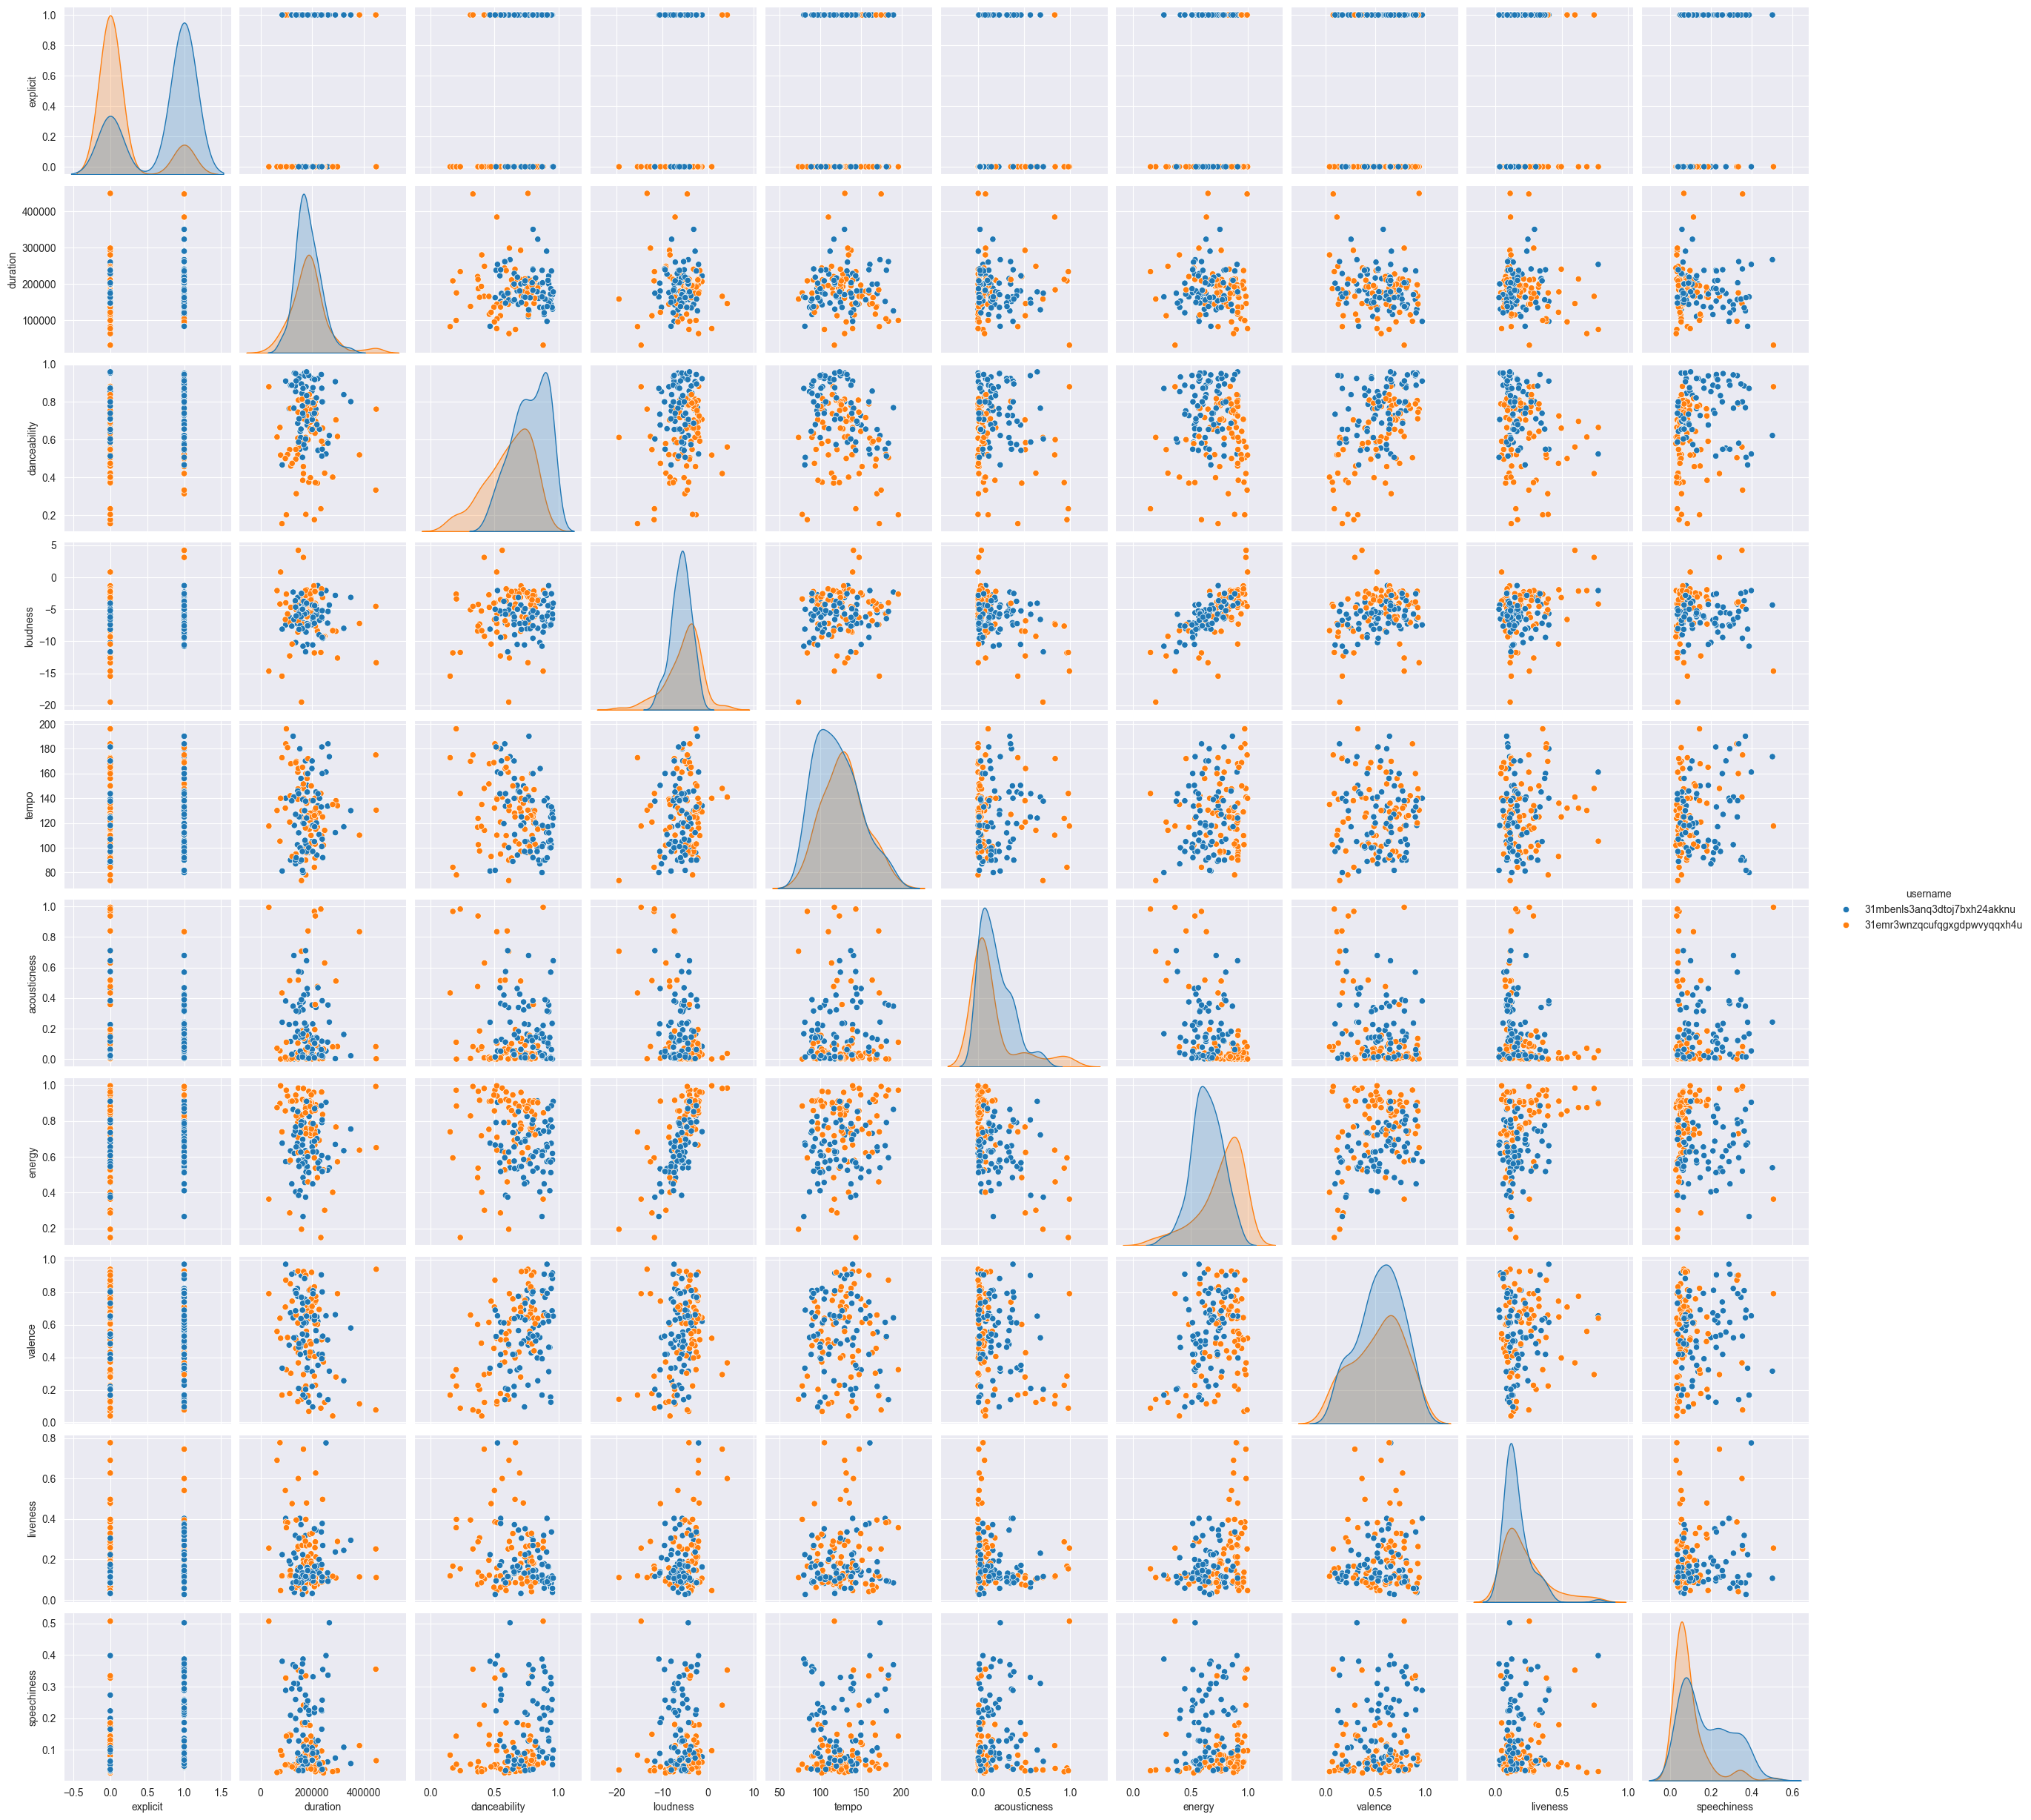

In [28]:
## doing a pairplot to see if there's a noticiable difference in their music
music_pairplot = sns.pairplot(df_songs, hue='username')
music_pairplot